<a href="https://colab.research.google.com/github/lenocahya/NLP/blob/main/NLP_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tugas Implementasi preprocessing**
Oleh :

22/507324/NPA/19810 - Nauval Dwi Primadya

22/507332/NPA/19812 - Leno Dwi Cahya 

22/507287/NPA/19785 - Julius Imanuel Theo Krisna


Import Pandas untuk membaca dataset

In [ ]:
import pandas as pd
import numpy as np

Membaca dataset dari dataset_final-sample.xlsx

In [ ]:
url = 'https://github.com/lenocahya/NLP/blob/main/dataset_final-sample.xlsx?raw=true'
df = pd.read_excel(url)
df

,no,jenis_infeksi,nama_penyakit,tanda_dan_gejala,Jumlah
0,1,Infeksi Virus,Allergic Rhinitis (Alergi Serbuk Bunga),"Hidung keluar lendir, choncae nasal kebiruan, ...",23
1,2,Infeksi Virus,Allergic Rhinitis (Alergi Serbuk Bunga),"Hidung berlendir, demam, choncae nasal kemerah...",23
2,3,Infeksi Virus,Allergic Rhinitis (Alergi Serbuk Bunga),"Hidung bau, nyeri di dalam hidung, ada krusta ...",23
3,4,Infeksi Virus,Allergic Rhinitis (Alergi Serbuk Bunga),"Gatal pada hidung, mata, tenggorokan, kulit, a...",23
4,5,Infeksi Virus,Allergic Rhinitis (Alergi Serbuk Bunga),"Bersin. Hidung meler. Gatal pada hidung, mata,...",23
...,...,...,...,...,...
158,443,Infeksi Virus,Gonore (Kencing Nanah),Rasa sakit atau nyeri saat buang air kecil dan...,25
159,461,NaN,Herpes Zoster,Belang merah. Lepuhan berisi cairan yang mudah...,18
160,462,NaN,Herpes Zoster,Ruam yang timbul pada satu sisi tubuh sesuai d...,18
161,463,NaN,Herpes Zoster,Nyeri pada kulit. Timbul ruam pada kulit. Nyer...,18


Mengambil informasi mengenai tanda dan gejala

In [ ]:
df[['tanda_dan_gejala']]

,tanda_dan_gejala
0,"Hidung keluar lendir, choncae nasal kebiruan, ..."
1,"Hidung berlendir, demam, choncae nasal kemerah..."
2,"Hidung bau, nyeri di dalam hidung, ada krusta ..."
3,"Gatal pada hidung, mata, tenggorokan, kulit, a..."
4,"Bersin. Hidung meler. Gatal pada hidung, mata,..."
...,...
158,Rasa sakit atau nyeri saat buang air kecil dan...
159,Belang merah. Lepuhan berisi cairan yang mudah...
160,Ruam yang timbul pada satu sisi tubuh sesuai d...
161,Nyeri pada kulit. Timbul ruam pada kulit. Nyer...


#**Case Folding**
- membuat semua huruf menjadi lowercase
- menghilangkan simbol-simbol selain -

Import re atau regular expression

In [ ]:
import re

In [ ]:
# Case folding
def case_folding(doc):
  doc = doc.lower()                                               # membuat semua huruf menjadi huruf kecil
  doc = re.sub('[!”#$%&’()*+,./:;<=>?@[\]^_`{|}~]','',doc)        # menghilangkan simbol selain -, pada data hanya ada simbol ,.- dapat hanya menghapus ., saja
  doc = re.sub('[0-9]','',doc)                                    # menghilangkan angka pada dokumen
  doc = re.sub('\s+', ' ', doc)                                   # menghilangkan multiple space
  return doc

In [ ]:
# Melakukan case folding pada kolom tanda dan gejala
df['case_folding'] = (df['tanda_dan_gejala']).apply(case_folding)
df[['case_folding']]

,case_folding
0,hidung keluar lendir choncae nasal kebiruan be...
1,hidung berlendir demam choncae nasal kemerahan...
2,hidung bau nyeri di dalam hidung ada krusta di...
3,gatal pada hidung mata tenggorokan kulit atau ...
4,bersin hidung meler gatal pada hidung mata ten...
...,...
158,rasa sakit atau nyeri saat buang air kecil dan...
159,belang merah lepuhan berisi cairan yang mudah ...
160,ruam yang timbul pada satu sisi tubuh sesuai d...
161,nyeri pada kulit timbul ruam pada kulit nyeri ...


# Tokenization

Import NLTK

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def word_tokenization(doc):
  token = word_tokenize(doc)
  return token
    

In [ ]:
df['token'] = (df['case_folding']).apply(word_tokenization)
df[['token']]

,token
0,"[hidung, keluar, lendir, choncae, nasal, kebir..."
1,"[hidung, berlendir, demam, choncae, nasal, kem..."
2,"[hidung, bau, nyeri, di, dalam, hidung, ada, k..."
3,"[gatal, pada, hidung, mata, tenggorokan, kulit..."
4,"[bersin, hidung, meler, gatal, pada, hidung, m..."
...,...
158,"[rasa, sakit, atau, nyeri, saat, buang, air, k..."
159,"[belang, merah, lepuhan, berisi, cairan, yang,..."
160,"[ruam, yang, timbul, pada, satu, sisi, tubuh, ..."
161,"[nyeri, pada, kulit, timbul, ruam, pada, kulit..."


#Filtering

In [ ]:
from nltk.corpus import stopwords

In [ ]:
listStopword =  set(stopwords.words('indonesian'))

def filtering(doc):
  hasil=[]
  for kata in doc:
    if kata not in listStopword:
      hasil.append(kata) 
  return hasil

In [ ]:
df['filter'] = (df['token']).apply(filtering)
df[['token','filter']]

,token,filter
0,"[hidung, keluar, lendir, choncae, nasal, kebir...","[hidung, lendir, choncae, nasal, kebiruan, ber..."
1,"[hidung, berlendir, demam, choncae, nasal, kem...","[hidung, berlendir, demam, choncae, nasal, kem..."
2,"[hidung, bau, nyeri, di, dalam, hidung, ada, k...","[hidung, bau, nyeri, hidung, krusta, hidung]"
3,"[gatal, pada, hidung, mata, tenggorokan, kulit...","[gatal, hidung, mata, tenggorokan, kulit, area..."
4,"[bersin, hidung, meler, gatal, pada, hidung, m...","[bersin, hidung, meler, gatal, hidung, mata, t..."
...,...,...
158,"[rasa, sakit, atau, nyeri, saat, buang, air, k...","[sakit, nyeri, buang, air, keluarnya, cairan, ..."
159,"[belang, merah, lepuhan, berisi, cairan, yang,...","[belang, merah, lepuhan, berisi, cairan, mudah..."
160,"[ruam, yang, timbul, pada, satu, sisi, tubuh, ...","[ruam, timbul, sisi, tubuh, sesuai, saraf, ter..."
161,"[nyeri, pada, kulit, timbul, ruam, pada, kulit...","[nyeri, kulit, timbul, ruam, kulit, nyeri, rua..."


#Stemming


install dan import Sastrawi

In [ ]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 31.4 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def stemming(doc):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  hasil = []
  for kata in doc:
    kata = stemmer.stem(kata)
    hasil.append(kata)
  return hasil;

In [ ]:
df['stemming'] = df['filter'].apply(stemming)
df[['stemming']]

,stemming
0,"[hidung, lendir, choncae, nasal, biru, bersin]"
1,"[hidung, lendir, demam, choncae, nasal, merah,..."
2,"[hidung, bau, nyeri, hidung, krusta, hidung]"
3,"[gatal, hidung, mata, tenggorok, kulit, area, ..."
4,"[bersin, hidung, meler, gatal, hidung, mata, t..."
...,...
158,"[sakit, nyeri, buang, air, keluar, cair, kenta..."
159,"[belang, merah, lepuh, isi, cair, mudah, pecah..."
160,"[ruam, timbul, sisi, tubuh, sesuai, saraf, inf..."
161,"[nyeri, kulit, timbul, ruam, kulit, nyeri, rua..."


# Hasil Semua Proses

In [ ]:
df

,no,jenis_infeksi,nama_penyakit,tanda_dan_gejala,Jumlah,case_folding,token,filter,stemming
0,1,Infeksi Virus,Allergic Rhinitis (Alergi Serbuk Bunga),"Hidung keluar lendir, choncae nasal kebiruan, ...",23,hidung keluar lendir choncae nasal kebiruan be...,"[hidung, keluar, lendir, choncae, nasal, kebir...","[hidung, lendir, choncae, nasal, kebiruan, ber...","[hidung, lendir, choncae, nasal, biru, bersin]"
1,2,Infeksi Virus,Allergic Rhinitis (Alergi Serbuk Bunga),"Hidung berlendir, demam, choncae nasal kemerah...",23,hidung berlendir demam choncae nasal kemerahan...,"[hidung, berlendir, demam, choncae, nasal, kem...","[hidung, berlendir, demam, choncae, nasal, kem...","[hidung, lendir, demam, choncae, nasal, merah,..."
2,3,Infeksi Virus,Allergic Rhinitis (Alergi Serbuk Bunga),"Hidung bau, nyeri di dalam hidung, ada krusta ...",23,hidung bau nyeri di dalam hidung ada krusta di...,"[hidung, bau, nyeri, di, dalam, hidung, ada, k...","[hidung, bau, nyeri, hidung, krusta, hidung]","[hidung, bau, nyeri, hidung, krusta, hidung]"
3,4,Infeksi Virus,Allergic Rhinitis (Alergi Serbuk Bunga),"Gatal pada hidung, mata, tenggorokan, kulit, a...",23,gatal pada hidung mata tenggorokan kulit atau ...,"[gatal, pada, hidung, mata, tenggorokan, kulit...","[gatal, hidung, mata, tenggorokan, kulit, area...","[gatal, hidung, mata, tenggorok, kulit, area, ..."
4,5,Infeksi Virus,Allergic Rhinitis (Alergi Serbuk Bunga),"Bersin. Hidung meler. Gatal pada hidung, mata,...",23,bersin hidung meler gatal pada hidung mata ten...,"[bersin, hidung, meler, gatal, pada, hidung, m...","[bersin, hidung, meler, gatal, hidung, mata, t...","[bersin, hidung, meler, gatal, hidung, mata, t..."
...,...,...,...,...,...,...,...,...,...
158,443,Infeksi Virus,Gonore (Kencing Nanah),Rasa sakit atau nyeri saat buang air kecil dan...,25,rasa sakit atau nyeri saat buang air kecil dan...,"[rasa, sakit, atau, nyeri, saat, buang, air, k...","[sakit, nyeri, buang, air, keluarnya, cairan, ...","[sakit, nyeri, buang, air, keluar, cair, kenta..."
159,461,NaN,Herpes Zoster,Belang merah. Lepuhan berisi cairan yang mudah...,18,belang merah lepuhan berisi cairan yang mudah ...,"[belang, merah, lepuhan, berisi, cairan, yang,...","[belang, merah, lepuhan, berisi, cairan, mudah...","[belang, merah, lepuh, isi, cair, mudah, pecah..."
160,462,NaN,Herpes Zoster,Ruam yang timbul pada satu sisi tubuh sesuai d...,18,ruam yang timbul pada satu sisi tubuh sesuai d...,"[ruam, yang, timbul, pada, satu, sisi, tubuh, ...","[ruam, timbul, sisi, tubuh, sesuai, saraf, ter...","[ruam, timbul, sisi, tubuh, sesuai, saraf, inf..."
161,463,NaN,Herpes Zoster,Nyeri pada kulit. Timbul ruam pada kulit. Nyer...,18,nyeri pada kulit timbul ruam pada kulit nyeri ...,"[nyeri, pada, kulit, timbul, ruam, pada, kulit...","[nyeri, kulit, timbul, ruam, kulit, nyeri, rua...","[nyeri, kulit, timbul, ruam, kulit, nyeri, rua..."


Menghitung Term Frequency

kemunculan term i pada dokumen j dibagi total term pada dokumen j
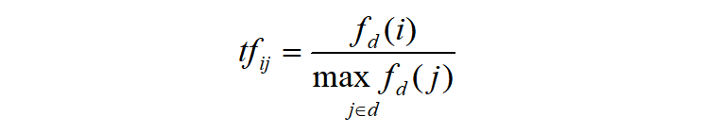

In [ ]:
def cal_tf(doc):
  tf_dict = {}
  # mencari banyaknya term muncul dalam dokumen
  for term in doc:
    if term in tf_dict:
      tf_dict[term]+=1
    else:
      tf_dict[term] = 1
  # mencari frekuensi dari banyaknya term i pada dokumen dibagi banyaknya total term pada dokumen tersebut
  for term in tf_dict:
    tf_dict[term] = tf_dict[term]/len(doc)
  return tf_dict

df['tf']=df['stemming'].apply(cal_tf)
# f =df['stemming'].apply(cal_tf)
df['tf'][1]
# f[1]

{'hidung': 0.14285714285714285,
 'lendir': 0.14285714285714285,
 'demam': 0.14285714285714285,
 'choncae': 0.14285714285714285,
 'nasal': 0.14285714285714285,
 'merah': 0.14285714285714285,
 'bersin': 0.14285714285714285}

Menghitung IDF

In [ ]:
def calc_df(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

docf = calc_df(df['tf'])
docf

{'hidung': 17,
 'lendir': 4,
 'choncae': 3,
 'nasal': 3,
 'biru': 2,
 'bersin': 17,
 'demam': 80,
 'merah': 44,
 'bau': 14,
 'nyeri': 88,
 'krusta': 1,
 'gatal': 29,
 'mata': 28,
 'tenggorok': 23,
 'kulit': 17,
 'area': 3,
 'batuk': 38,
 'meler': 4,
 'sumbat': 9,
 'air': 34,
 'lingkar': 1,
 'hitam': 3,
 'sakit': 76,
 'kepala': 50,
 'terus': 5,
 'gejala': 15,
 'jenis': 2,
 'eksim': 1,
 'kering': 14,
 'lepuh': 4,
 'lelah': 25,
 'pilek': 5,
 'perut': 33,
 'belah': 4,
 'kanan': 12,
 'daerah': 6,
 'pusar': 5,
 'lemas': 14,
 'tajam': 5,
 'gerak': 3,
 'tanda': 7,
 'utama': 1,
 'hilang': 25,
 'selera': 9,
 'makan': 35,
 'mual': 23,
 'muntah': 23,
 'bengkak': 42,
 'ketidakmampuan': 3,
 'kentut': 7,
 'flatus': 3,
 'komplikasi': 1,
 'lengket': 3,
 'perforasi': 1,
 'susah': 3,
 'ringan': 12,
 'diare': 16,
 'kembung': 4,
 'nafsu': 23,
 'usus': 1,
 'buntu': 1,
 'jalan': 2,
 'buang': 17,
 'gas': 2,
 'konstipasi': 6,
 'besar': 6,
 'nagian': 1,
 'danatau': 1,
 'meriang': 2,
 'muncul': 14,
 'otot': 34,


In [ ]:
n_document = len(df)
n_document

163

In [ ]:
def calc_IDF(n, docf):
    IDF_Dict = {}
    for term in docf:
        # IDF_Dict[term] = np.log(n / (docf[term] + 1))
        IDF_Dict[term] = -(np.log2(n / (docf[term])))
    return IDF_Dict
  
#Stores the idf dictionary
idf = calc_IDF(n_document, docf)
df_idf = pd.DataFrame(idf, index=[0])
df_idf



,hidung,lendir,choncae,nasal,biru,bersin,demam,merah,bau,nyeri,...,dubur,belang,isi,limut,torso,panas-dingin,tusuk,ering,koreng,gelembung
0,-3.261265,-5.348728,-5.763766,-5.763766,-6.348728,-3.261265,-1.0268,-1.889297,-3.541373,-0.889297,...,-7.348728,-7.348728,-5.763766,-7.348728,-7.348728,-7.348728,-7.348728,-7.348728,-7.348728,-7.348728


Menghitung TF-IDF

In [ ]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * idf[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
df["TF-IDF_dict"] = df["tf"].apply(calc_TF_IDF)
df[['TF-IDF_dict']]

,TF-IDF_dict
0,"{'hidung': -0.5435442188301229, 'lendir': -0.8..."
1,"{'hidung': -0.465895044711534, 'lendir': -0.76..."
2,"{'hidung': -1.630632656490369, 'bau': -0.59022..."
3,"{'gatal': -0.31134339488793816, 'hidung': -0.6..."
4,"{'bersin': -0.10520210687034638, 'hidung': -0...."
...,...
158,"{'sakit': -0.091733386732291, 'nyeri': -0.0741..."
159,"{'belang': -0.3340330979195944, 'merah': -0.08..."
160,"{'ruam': -0.2787672037989458, 'timbul': -0.119..."
161,"{'nyeri': -0.14821608926563004, 'kulit': -0.36..."


In [ ]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(docf.items())

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

df["TF_IDF_Vec"] = df["TF-IDF_dict"].apply(calc_TF_IDF_Vec)
df['TF_IDF_Vec']

td = df['TF_IDF_Vec'].array
tfidf = pd.DataFrame(td, columns = unique_term)
tfidf

,aba,abdomen,abu,adang,adenopati,air,ajak,akar,akibat,alami,...,ventrikel,vertigo,vesikel,virus,viseral,vomitus,vulva,wajah,warna,weakness
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,-0.141329,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,-0.072944,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.0,0.0,0.0,0.0,0.0,-0.188439,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.178273,0.0
159,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.228491,0.000000,0.0
160,0.0,0.0,0.0,0.0,0.0,-0.119014,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
161,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [ ]:
tfidf.to_excel('tfidf.xlsx')